In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    qwery = """
    SELECT DATE(datetime) as date, COUNT(*) AS visit_count
    FROM pageviews
    WHERE uid LIKE 'user_%'
    GROUP BY date
    """

    df = pd.read_sql(qwery, connection)
    df['date'] = pd.to_datetime(df['date'])
except FileNotFoundError as e:
    print("File not found")
    raise e

print("Scheme table pageviews")
print(df)


Scheme table pageviews
         date  visit_count
0  2020-04-17            1
1  2020-04-18           23
2  2020-04-19           15
3  2020-04-21            3
4  2020-04-22            1
5  2020-04-23            5
6  2020-04-25            1
7  2020-04-26            8
8  2020-04-28            2
9  2020-04-29            4
10 2020-04-30            9
11 2020-05-01            3
12 2020-05-02            6
13 2020-05-03           19
14 2020-05-04            1
15 2020-05-05            1
16 2020-05-06            3
17 2020-05-07            2
18 2020-05-08           48
19 2020-05-09           19
20 2020-05-10          110
21 2020-05-11          200
22 2020-05-12           85
23 2020-05-13          102
24 2020-05-14          187
25 2020-05-15           29
26 2020-05-16            4
27 2020-05-17            9
28 2020-05-18           51
29 2020-05-19           11
30 2020-05-20           12
31 2020-05-21           11
32 2020-05-22            2


<Figure size 1500x800 with 0 Axes>

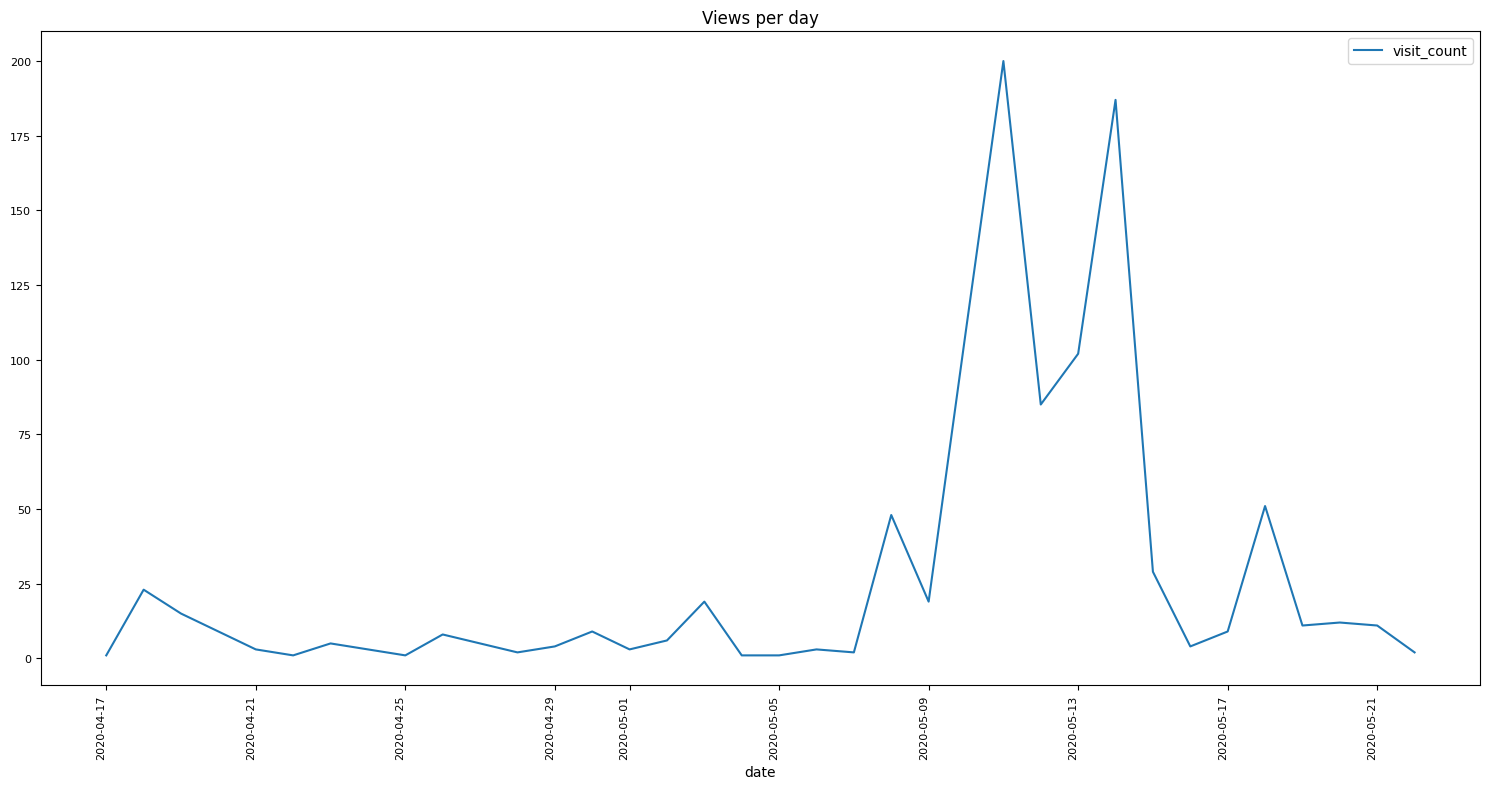

In [3]:
# Создаем график
plt.figure(figsize=(15, 8))
df.plot(x='date', y='visit_count',
        kind='line',
        figsize=(15, 8),
        title='Views per day',
        fontsize=8)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
connection.close()